In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

* Layer of split : block3_pool

In [2]:
ec = np.load('vis\\0.1loss_1Burst_8packet_block3_poolEC.npy') #with error concealment
normal = np.load('vis\\1e-05loss_3Burst_8packet_block3_poolnormal.npy') #no loss
noec = np.load('vis\\0.1loss_1Burst_8packet_block3_pool.npy') #no error concealment but with loss
loss = np.load('vis\\0.1loss_1Burst_8packet_block3_poolloss.npy') #lost indices

In [3]:
np.set_printoptions(threshold=np.nan)
loss = np.squeeze(loss, axis=0)
j = np.lexsort((loss[:,0], loss[:,-1]))
loss = loss[j]

In [5]:
p = 8 #number of rows per packet

In [6]:
from vis.quantizer import QLayer as QL

In [7]:
def visualizeLayer(tensorPlane):
    qt = QL(8)
    qt.bitQuantizer(tensorPlane)
    return qt.quanData

## 2 consecutive packets of batch 2 and channel 2 are lost

### With error concealment

In [13]:
bq = ec[57,:,:,0]
bq[7:17, 8:11]

array([[1461.72094727,  754.79699707, 1251.87475586],
       [ 992.92858887,  182.34306335,  669.34814453],
       [3498.89526367, 2523.39794922, 2504.62280273],
       [ 293.43087769, 1028.5435791 , 2751.6862793 ],
       [   0.        ,    0.        ,   77.75593567],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ],
       [ 514.1449585 , 1198.25891113,    0.        ],
       [1268.85668945, 1585.66784668,    0.        ]])

In [15]:
visData = visualizeLayer(ec[47,:,:,1])
visData[7:25, 10:14]

bit quantizer complete in 0.0!!


array([[ 36., 128.,  68.,  50.],
       [ 34., 127.,  70.,  58.],
       [ 32., 126.,  71.,  67.],
       [ 30., 125.,  72.,  75.],
       [ 29., 125.,  73.,  83.],
       [ 27., 124.,  74.,  91.],
       [ 25., 123.,  75.,  99.],
       [ 23., 123.,  76., 107.],
       [ 22., 122.,  78., 116.],
       [ 20., 121.,  79., 124.],
       [ 18., 120.,  80., 132.],
       [ 16., 120.,  81., 140.],
       [ 14., 119.,  82., 148.],
       [ 13., 118.,  83., 157.],
       [ 11., 118.,  84., 165.],
       [  9., 117.,  86., 173.],
       [  7., 116.,  87., 181.],
       [  7., 116.,  87., 181.]])

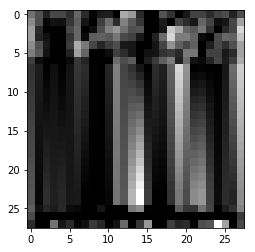

In [9]:
plt.imshow(visData, cmap='gray')

### No error concealment

In [16]:
visData = visualizeLayer(noec[47,:,:,1])
visData[7:25, 10:14]

bit quantizer complete in 0.0009999275207519531!!


array([[ 36., 128.,  68.,  50.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  7., 116.,  87., 181.]])

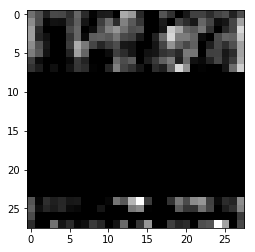

In [11]:
plt.imshow(visData, cmap='gray')

### No error concealment or loss

In [15]:
visData = visualizeLayer(normal[1,:,:,0])
np.unique(visData)

bit quantizer complete in 0.0009999275207519531!!


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  61.,  64.,  65.,  66.,  67.,  69.,  70.,  72.,
        73.,  74.,  77.,  78.,  79.,  86.,  93., 102., 108., 124., 125.,
       128., 153., 159., 166., 168., 191., 205., 209., 222., 255.])

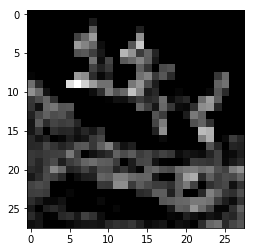

In [58]:
plt.imshow(visData, cmap='gray')

In [14]:
r = np.arange(1, 17)/(16)
r

array([0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375, 0.5   ,
       0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375, 1.    ])